# 국내 여행 지표 분석

작성자 : 김찬종
작성일 : 2024.05.30.

## 목차
1. 프로젝트 목적
2. 데이터 수집 방법
3. 데이터 전처리
4. 데이터 분석
5. 결론

### 1. 프로젝트 목적
- 국내 여행 자료 분석을 통해 여행 인원, 여행지 선택이유와 정보 획득 도구와 여행 준비과정부터 만족도까지 상세하게 확인하고자 함.

### 2. 데이터 수집방법
- 데이터는 관광지식정보시스템 홈페이지(https://know.tour.go.kr/stat/nResearchSumDis19Re.do)에서 다운로드함.

### 3. 데이터 전처리
- 원 데이터가 방대하여 해당 프로젝트 목적에 맞게 재가공하여 사용함.
- 데이터 없는 조사 내용 삭제 후 분석함.
- 인기 여행지 선정시 이동 지역 고려하지않고 첫 목적지를 기준으로 산정함.
- 지출 높은 여행지 선정시 숙박일 고려하지 않고 산정함.
- 월 별 여행인원의 경우 설문 조사 내 동행인까지 포함하여 산정하였으며 중복 고려하지 않음.

#### 활용한 데이터 파일
- 국민여행조사 : 본 프로젝트에서 사용할 설문조사 내용이 담겨 있는 데이터파일.
- 국민여행코드북 : 국민여행조사 데이터 파일의 변수이름과 설명 작성되어있음.
- 지역코드북 : 설문조사 내 지역 번호를 지역 이름으로 변환하기 위한 파일.
- 만족도 : 데이터 분석 중 추가 데이터 수집을 위해 만든 파일.

### 4. 데이터 분석 (코드 첨부)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
font_path='C:/Windows/Fonts/gulim.ttc'

from PIL import Image
maskSKorea = np.array(Image.open('data/SouthKorea2.jpg'))

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('data/국민여행조사.xlsx')
book = pd.read_excel('data/국민여행코드북.xlsx')
loc = pd.read_csv('data/지역코드북.csv', encoding = 'cp949')
resinfo = pd.read_csv('data/만족도.csv', encoding='cp949')

In [2]:
## 데이터 재가공
tr_df=pd.DataFrame(columns=['여행유형','시작날짜_년','시작날짜_월','시작날짜_일','여행일수(박)','여행총경비','여행인원',
                            '1인지출비용','여행지역','성별','연령', '만족도', '재방문', '지인추천'])
for i in range(1,7):
    case=data[['D_TRA'+str(i)+'_CASE','D_TRA'+str(i)+'_SYEAR','D_TRA'+str(i)+'_SMONTH',
               'D_TRA'+str(i)+'_SDAY','D_TRA'+str(i)+'_S_Day','D_TRA'+str(i)+'_COST',
               'D_TRA'+str(i)+'_NUM','D_TRA'+str(i)+'_ONE_COST','D_TRA'+str(i)+'_1_SPOT','BSEX','BAGE', 'A10', 'A11', 'A12']]
    case.columns=['여행유형','시작날짜_년','시작날짜_월','시작날짜_일','여행일수(박)','여행총경비','여행인원',
                  '1인지출비용','여행지역','성별','연령', '만족도', '재방문', '지인추천']
    tr_df=pd.concat([tr_df,case],ignore_index=True)
tr_df.dropna(subset=['여행지역'],inplace=True,ignore_index=True)

tr_df=tr_df.convert_dtypes()
tr_df[['여행지역','여행유형','성별','연령']]=tr_df[['여행지역','여행유형','성별','연령']].astype('str')
tr_df['여행유형']=tr_df['여행유형'].astype('category')
tr_df['여행유형']=tr_df['여행유형'].cat.rename_categories({'1':'관광여행','2':'방문여행','3':'단순방문','4':'출장여행','5':'단순출장'})
tr_df['성별']=tr_df['성별'].astype('category')
tr_df['성별']=tr_df['성별'].cat.rename_categories({'1':'남성','2':'여성'})
tr_df['연령']=tr_df['연령'].astype('category')
tr_df['연령']=tr_df['연령'].cat.rename_categories({'1':'15-19세','2':'20대','3':'30대','4':'40대','5':'50대','6':'60대','7':'70대 이상'})
tr_df

,여행유형,시작날짜_년,시작날짜_월,시작날짜_일,여행일수(박),여행총경비,여행인원,1인지출비용,여행지역,성별,연령,만족도,재방문,지인추천
0,관광여행,2022,1,15,2,800000,5,160000,32070,여성,15-19세,5,4,4
1,관광여행,2022,1,9,5,1000000,1,1000000,39020,여성,30대,5,5,5
2,관광여행,2022,1,30,1,399999,3,133333,32030,남성,30대,5,5,4
3,관광여행,2022,1,29,2,600003,3,200001,32030,남성,50대,5,5,4
4,관광여행,2022,1,9,0,100000,2,50000,32010,남성,40대,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26558,관광여행,2022,3,27,0,100000,2,50000,34340,여성,50대,4,4,3
26559,관광여행,2022,1,30,0,39999,3,13333,37070,남성,60대,4,4,4
26560,단순출장,2022,2,27,0,20000,1,20000,22020,남성,40대,<NA>,<NA>,<NA>
26561,단순출장,2022,3,31,0,20000,1,20000,32020,남성,40대,<NA>,<NA>,<NA>


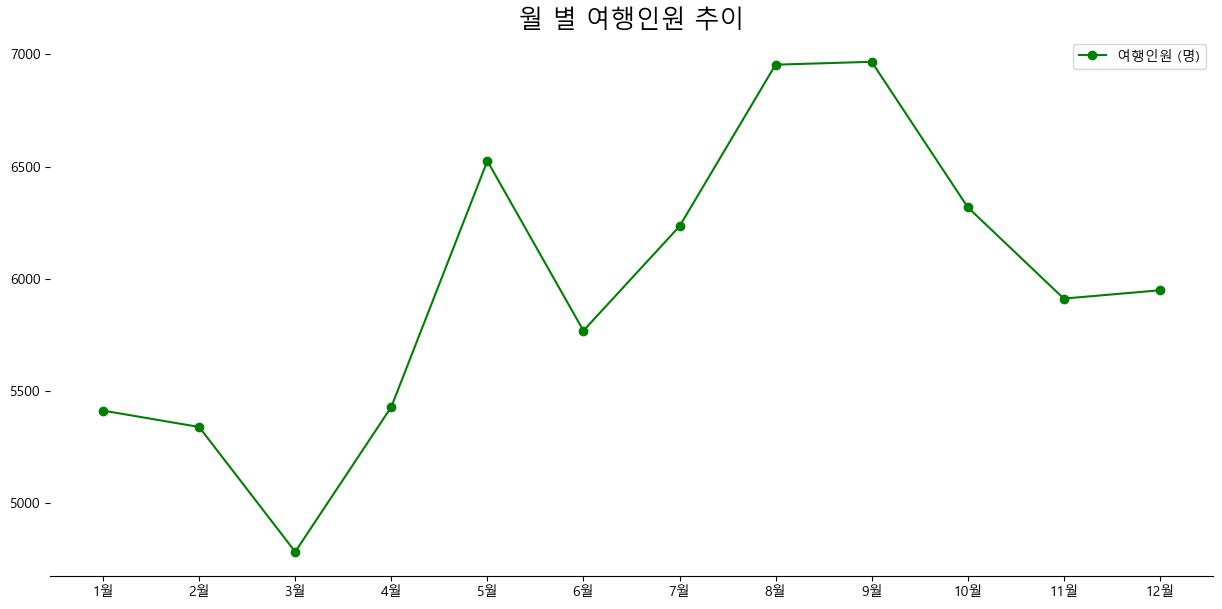

In [3]:
# 월 별 여행인원 데이터
mon_pop = pd.DataFrame(tr_df['여행인원'].groupby(tr_df['시작날짜_월']).sum())
mon_pop.reset_index(inplace=True)

## 월 별 여행인원 시각화
plt.figure(figsize=(15, 7))
plt.plot(mon_pop['시작날짜_월'].values, mon_pop['여행인원'].values, 'go-', label='여행인원 (명)')
sns.despine(left=True)
plt.title('월 별 여행인원 추이',fontdict={'size':18 , 'family':'Malgun Gothic'})
plt.xticks(np.arange(1,13,1),[ str(x)+'월' for x in range(1, 13)])
plt.legend(loc='best')
plt.show()

In [9]:
# 여행지역 추출 (이동하면서 지역이 변경된 경우는 고려하지않음)
loc_d = [word for word in data if '_1_SPOT' in word]
dloc=data[loc_d]
dloc.dropna(how='all',inplace=True)
 
# 많이 방문한 지역 상위 30곳 출력
local_data=dloc['D_TRA1_1_SPOT'].dropna().to_list()

for i in range(2,7):
    ex = dloc['D_TRA'+str(i)+'_1_SPOT'].dropna().to_list()
    local_data.extend(ex)
local_data=map(int,local_data)

loc_dict = {'a':[0]}
for i in local_data : 
    if str(i) not in loc_dict:
        loc_dict[str(i)]=0
    loc_dict[str(i)]+=1
df_loc = pd.DataFrame(loc_dict)

loc.dropna(inplace=True)
loc['지역명']=loc['시/도명']+" "+loc['시/군/구 코드']
loc[['지역명','지역코드']]
df_loc=df_loc.T
df_loc.columns=['지역코드']

df_loc.reset_index(inplace=True)
df_loc = df_loc.rename(columns={'index':'지역번호', '지역코드' : '방문 횟수'})
df_loc = df_loc.drop([0])
df_loc['지역번호'] = df_loc['지역번호'].astype(dtype='float64')
df_loc
loc_df = loc[['지역코드','지역명']]
df_loc['지역번호'] = df_loc['지역번호'].convert_dtypes()
df_loc['지역번호'] = df_loc['지역번호'].astype('str')
df_loc['지역번호'] = df_loc['지역번호'].astype('int64')
totloc = pd.merge(df_loc, loc_df, how='inner', left_on='지역번호', right_on='지역코드')
totloc = totloc.drop('지역코드',axis=1)
top_loc = totloc.nlargest(30, '방문 횟수')
totloc

,지역번호,방문 횟수,지역명
0,32070,151,강원도 삼척시
1,39020,564,제주특별자치도 서귀포시
2,32030,656,강원도 강릉시
3,32010,350,강원도 춘천시
4,39010,625,제주특별자치도 제주시
...,...,...,...
224,21120,11,부산광역시 강서구
225,21080,15,부산광역시 북구
226,23020,7,인천광역시 동구
227,24020,28,광주광역시 서구


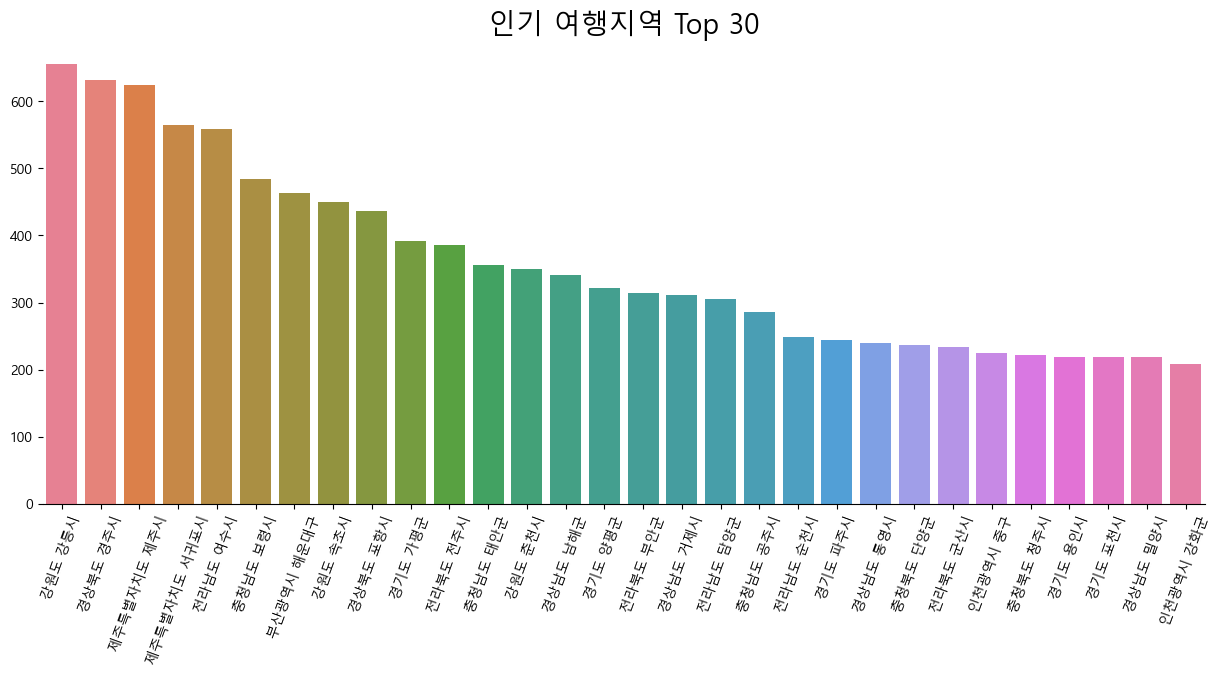

In [10]:
# 그래프 -  최다 방문 상위 30위
plt.figure(figsize=(15,6))
sns.barplot(x= top_loc['지역명'].values, y= top_loc['방문 횟수'].values, palette='husl')
sns.despine(left=True)
plt.title('인기 여행지역 Top 30', fontfamily = 'Malgun Gothic', fontsize= 20)
plt.xticks(rotation = 70)
plt.show()

In [11]:
# 여행 1인 평균 지출 높은 상위 30지역 (여행일수 고려하지않음)
cost = pd.DataFrame(tr_df['1인지출비용'].groupby(tr_df['여행지역']).mean())
cost.reset_index(inplace=True)
cost['여행지역'] = cost['여행지역'].astype(dtype='float64')
cost
loc_df['지역코드'] = loc_df['지역코드'].astype(dtype='float64')
totcost = pd.merge(cost, loc_df, how='outer', left_on='여행지역', right_on='지역코드')
top_costloc = totcost.nlargest(30, '1인지출비용')
top_costloc[['여행지역', '지역코드']] = top_costloc[['여행지역', '지역코드']].convert_dtypes()
top_costloc[['여행지역', '지역코드']] = top_costloc[['여행지역', '지역코드']].astype(dtype='string')
top_costloc = top_costloc.drop('지역코드', axis=1)
top_costloc

,여행지역,1인지출비용,지역명
227,39010,504851.2928,제주특별자치도 제주시
228,39020,495575.953901,제주특별자치도 서귀포시
208,37430,409081.73913,경상북도 울릉군
33,21090,181588.565875,부산광역시 해운대구
26,21020,181282.608696,부산광역시 서구
111,32060,172486.246667,강원도 속초시
117,32350,171989.311475,강원도 정선군
25,21010,171580.357143,부산광역시 중구
184,36470,165197.986842,전라남도 진도군
116,32340,163487.190476,강원도 평창군


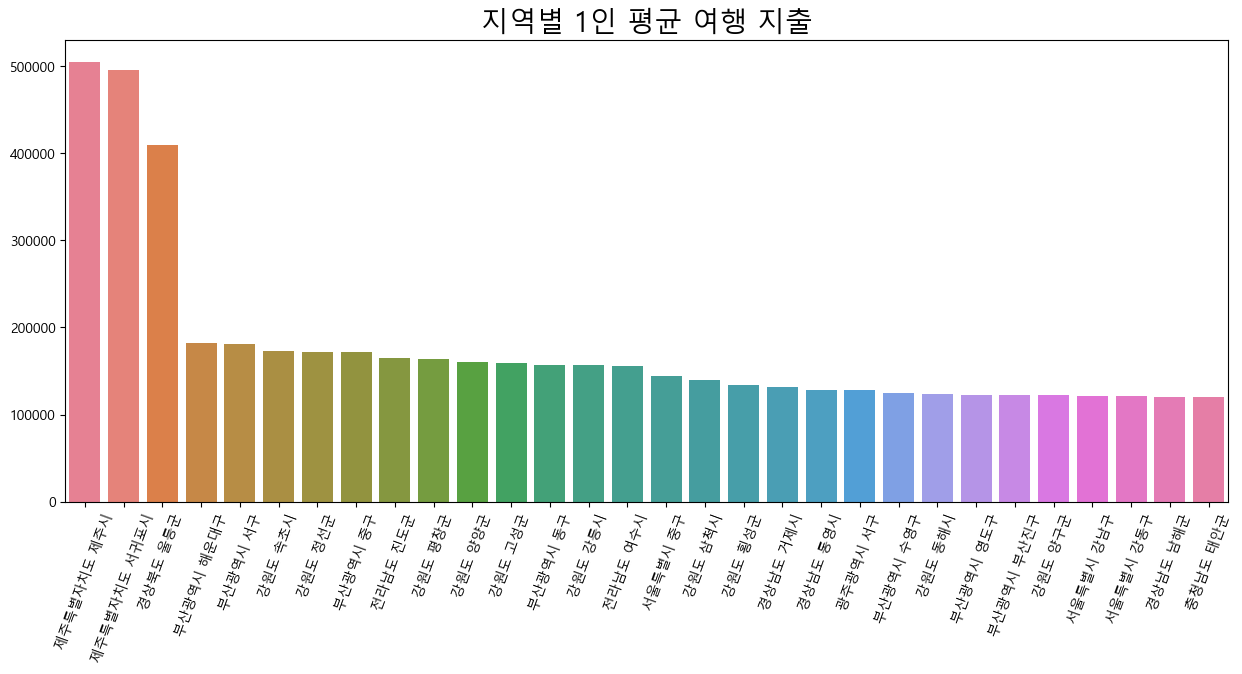

In [12]:
# 그래프 - 여행 1인 평균 지출 높은 상위 30개 지역

plt.figure(figsize=(15,6))
sns.barplot(x= top_costloc['지역명'].values, y= top_costloc['1인지출비용'].values, palette = 'husl')
plt.title('지역별 1인 평균 여행 지출', fontfamily = 'Malgun Gothic', fontsize= 20)
plt.xticks(rotation = 70)
plt.show()

In [14]:
# 여행지 선택 이유와 정보획득처 데이터
totres=pd.DataFrame(columns=['선택이유', '정보획득처'])
for i in range(1,3):
    case=resinfo[['선택이유' +str(i) + '순위', '정보획득' +str(i) + '순위']]
    case.columns=['선택이유', '정보획득처']
    totres=pd.concat([totres,case],ignore_index=True)
totres.dropna(how='all', inplace=True, ignore_index=True)
totres = totres.convert_dtypes()
totres = totres.fillna(0)
totres[['선택이유', '정보획득처']] = totres[['선택이유', '정보획득처']].astype('str')

totres['정보획득처']=totres['정보획득처'].astype(dtype='category')
totres['정보획득처']=totres['정보획득처'].cat.rename_categories({'0': '무응답', '1':'인터넷 사이트/모바일 앱','2':'기사 및 방송 프로그램',
                                                       '3':'광고','4':'여행사','5':'주변인','6':'관광 안내 서적','7':'과거 방문 경험', 
                                                       '8':'정보 없이 방문', '9':'기타'})
totres['선택이유']=totres['선택이유'].astype('category')
totres['선택이유']=totres['선택이유'].cat.rename_categories({'0': '무응답', '1':'여행지 지명도','2':'볼거리 제공','3':'저렴한 여행경비',
                                                     '4':'이동거리','5':'여행할 수 있는 시간','6':'숙박시설','7':'쇼핑', 
                                                     '8': '음식', '9': '교통편', '10': '체험프로그램 유무', '11': '경험자의 추천', 
                                                     '12': '관광지 편의시설', '13': '교육성', '14': '여행 동반자 유형', '15': '기타'})


sel_tra = pd.DataFrame(totres.groupby(totres['선택이유']).count())
sel_tra = sel_tra.reset_index()
sel_tra.rename(columns={'정보획득처' : '응답 수'}, inplace=True) 
sel_tra.set_index('선택이유', inplace=True)
sel_tra = sel_tra.sort_values(by=['응답 수'], ascending=False)

info_tra = pd.DataFrame(totres.groupby(totres['정보획득처']).count())
info_tra = info_tra.reset_index()
info_tra.rename(columns={'선택이유' : '응답 수'}, inplace=True) 
info_tra.set_index('정보획득처', inplace=True)
info_tra = info_tra.sort_values(by=['응답 수'], ascending=False)
info_tra

,응답 수
정보획득처,
무응답,13148
과거 방문 경험,9168
주변인,8244
인터넷 사이트/모바일 앱,5168
정보 없이 방문,4158
기사 및 방송 프로그램,1010
광고,750
관광 안내 서적,222
여행사,190


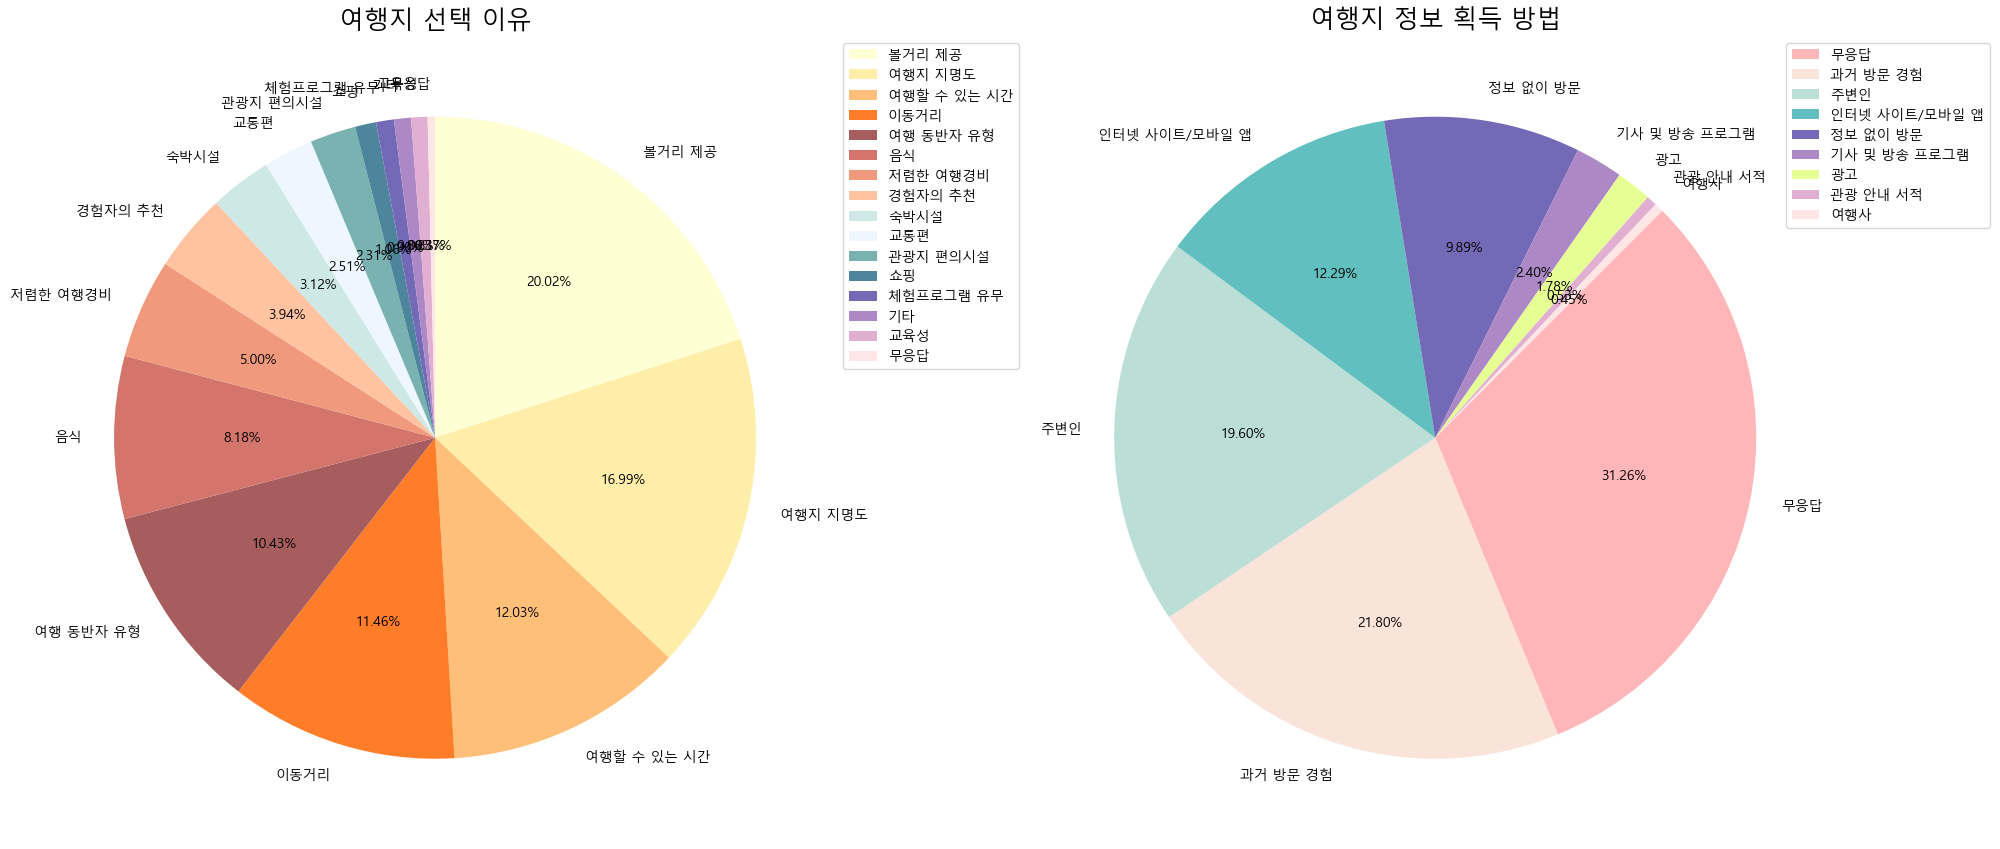

In [15]:
# PIE차트 - 여행지 선택이유, 정보 획득 방법 시각화
color1 = [ '#FEFFD2', '#FFEEA9', '#FFBF78', '#FF7D29', '#A75D5D', '#D3756B', '#F0997D', '#FFC3A1', '#CDE8E5', '#EEF7FF', '#7AB2B2', '#4D869C', '#7469B6', '#AD88C6', '#E1AFD1', '#FFE6E6']
color2 = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', '#7469B6', '#AD88C6', '#E6FF94', '#E1AFD1', '#FFE6E6']

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.pie(sel_tra['응답 수'], labels =sel_tra.index, autopct ='%1.2f%%', startangle=90, textprops ={'fontsize':10}, colors = color1,  counterclock=False)
plt.title('여행지 선택 이유', fontdict={'size':18, 'family':'Malgun Gothic'})
plt.legend(sel_tra.index, bbox_to_anchor=(1, 0, 0, 1))

plt.subplot(1,2,2)
plt.pie(info_tra['응답 수'], labels =info_tra.index, autopct ='%1.2f%%', startangle=45, textprops ={'fontsize':10}, colors = color2, counterclock=False )
plt.title('여행지 정보 획득 방법',fontdict={'size':18, 'family':'Malgun Gothic'})
plt.legend(info_tra.index, bbox_to_anchor=(1, 0, 0.2, 1))
plt.tight_layout()
plt.show()

In [16]:
# 여행 지역별 만족도/재방문의사/지인추천 데이터
tra_resch = pd.DataFrame(tr_df[['만족도', '재방문', '지인추천']].groupby(tr_df['여행지역']).mean())
tra_resch.reset_index(inplace=True)
tra_resch['여행지역'] = tra_resch['여행지역'].astype(dtype='float64')
loc_df['지역코드'] = loc_df['지역코드'].astype(dtype='float64')
tra_resech = pd.merge(tra_resch, loc_df, how='outer', left_on='여행지역', right_on='지역코드')
tra_resech = tra_resech.drop('지역코드', axis=1)
tra_resech['여행지역'] = tra_resech['여행지역'].convert_dtypes()
tra_resech['여행지역'] = tra_resech['여행지역'].astype(dtype='string')
sati = tra_resech[['여행지역', '만족도', '지역명']]
revi = tra_resech[['여행지역', '재방문', '지역명']]
reco = tra_resech[['여행지역', '지인추천', '지역명']]
sati_top10 = sati.nlargest(10, columns = '만족도')
revi_top10 = revi.nlargest(10, columns = '재방문')
reco_top10 = reco.nlargest(10, columns = '지인추천')

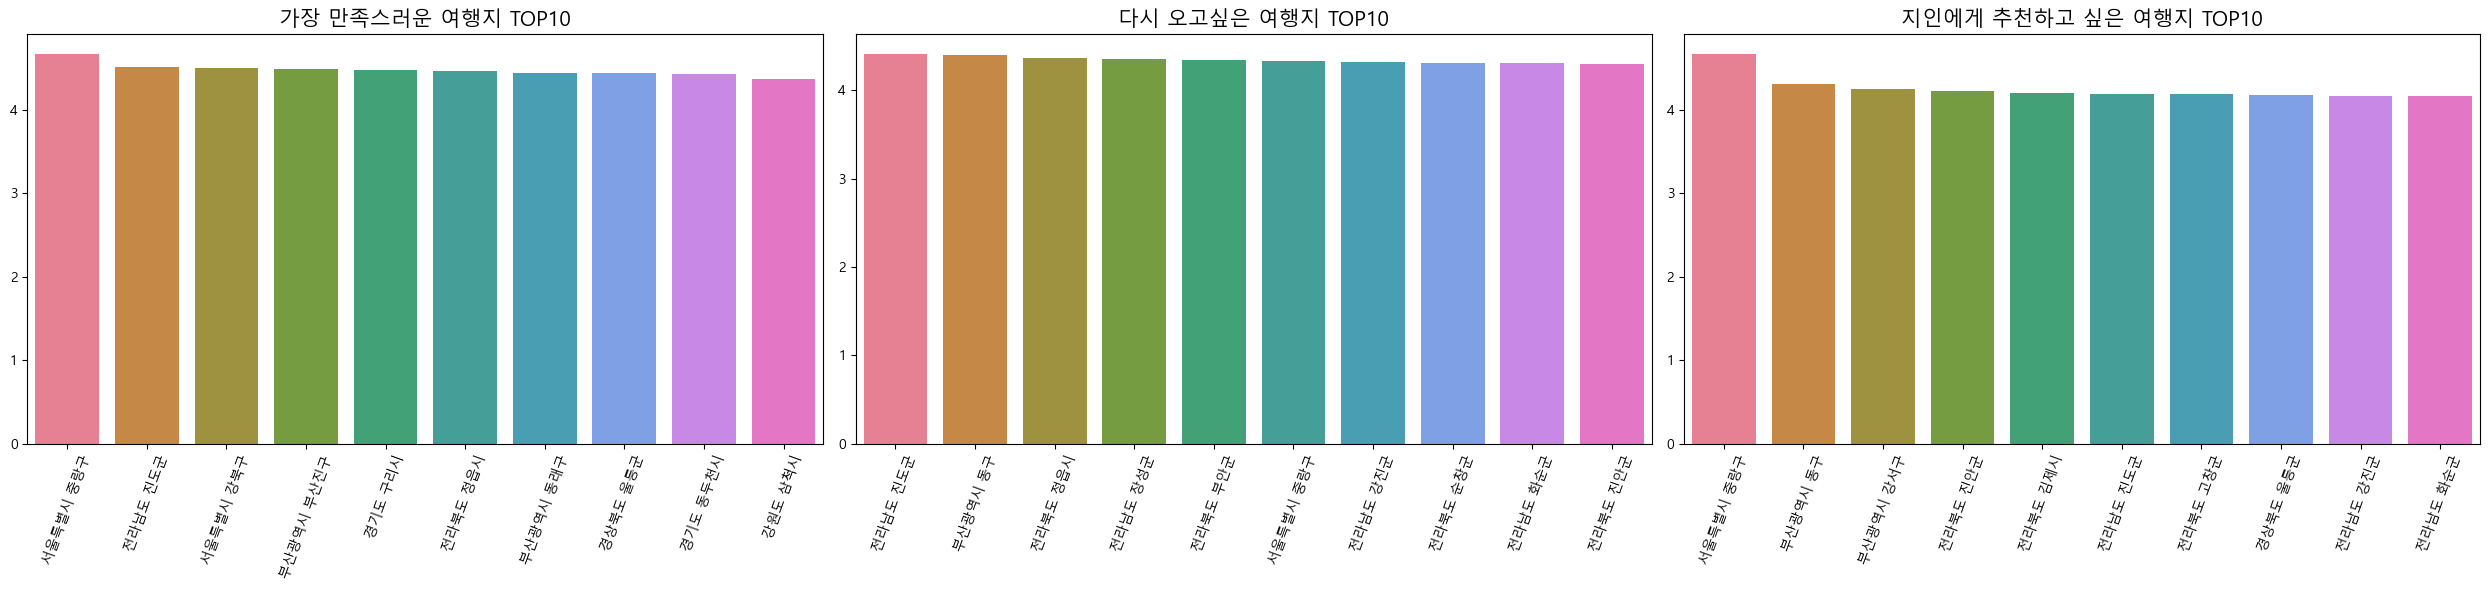

In [17]:
# 그래프 - 여행 지역별 만족도/재방문의사/지인추천 데이터 시각화
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.barplot(x= sati_top10['지역명'].values, y= sati_top10['만족도'].values, palette = 'husl')
plt.title('가장 만족스러운 여행지 TOP10', fontdict={'size':15, 'family':'Malgun Gothic'})
plt.xticks(rotation = 70)

plt.subplot(1,3,2)
sns.barplot(x= revi_top10['지역명'].values, y= revi_top10['재방문'].values, palette = 'husl')
plt.title('다시 오고싶은 여행지 TOP10',fontdict={'size':15, 'family':'Malgun Gothic'})
plt.xticks(rotation = 70)

plt.subplot(1,3,3)
sns.barplot(x= reco_top10['지역명'].values, y= reco_top10['지인추천'].values, palette = 'husl')
plt.title('지인에게 추천하고 싶은 여행지 TOP10',fontdict={'size':15, 'family':'Malgun Gothic'})
plt.xticks(rotation = 70)

plt.tight_layout()
plt.show()

### 5.결론
- 원본 데이터를 활용한 분석이 아닌 2차 가공 데이터로 분석하여 다소 오차 발생할 수 있음.

#### 분석 결과 요약
- 여행 인기지역은 강릉, 경주, 제주, 여수, 보령, 해운대 등이 있음.
- 여행 인기 월은 5, 8, 9 월로 다른 월에 비해 유의미하게 높았고 반대로 3, 4월의 경우 상당히 저조한 여행 기록 보임.
- 여행 지출 비용은 제주도와 울릉도가 타 지역에 비해 압도적으로 높은데, 이는 교통수단과 숙박일 수에 의해 산정된 것으로 보임.
- 여행지 선택 이유로 볼거리제공, 여행지 지명도,  여행 가능한 시간, 이동거리 순으로 높음.
- 여행지 정보는 무응답이 가장 높았으며 그 외 주로 과거 경험과 주변인, 인터넷으로 수집함.

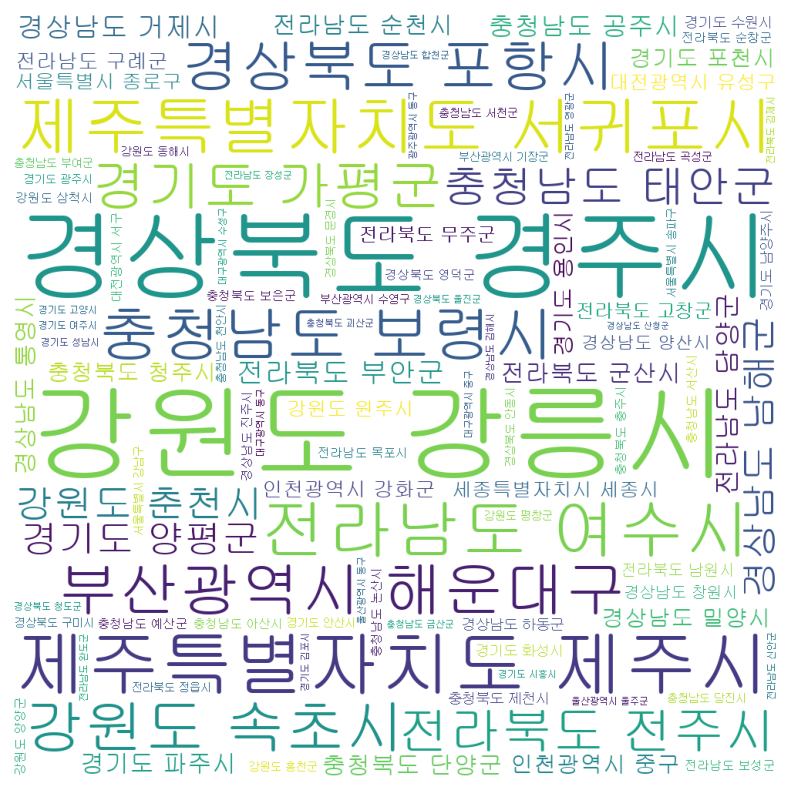

In [18]:
# wordcloud
loc_name = pd.DataFrame(tr_df['여행지역'])
loc['지역명']=loc['시/도명']+" "+loc['시/군/구 코드']
loc[['시/도코드','지역코드']]=loc[['시/도코드','지역코드']].astype('str')
word = pd.merge(loc_name,loc, how='outer', left_on = '여행지역', right_on = '지역코드')
loc_dict=word.groupby('지역명')['지역코드'].agg('count')
loc_dict=loc_dict.to_dict()

plt.figure(figsize=(20,10))
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=100,margin=10,random_state=4, font_path = font_path).fit_words(loc_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()